<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Edureka_Sequence_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Prediction of Stock Prices with RNN-GRU for IBM

## Problem Statement

A recurrent neural network deals with sequence problems because 
their connections form a directed cycle. RNN is widely used for time 
series forecasting because of these characteristics. Many state of 
the art results have been achieved using RNN/GRU/LSTM. 
In this problem, we will try to predict the stock prices of IBM by 
using a multi-layer RNN/GRU model. 

In [1]:
import pandas as pd

data = pd.read_csv("/content/IBM_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=["Date"])
print(data.shape)

(3020, 6)


In [2]:
data.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
2006-01-10,83.15,84.12,83.12,84.07,5701000,IBM
2006-01-11,84.37,84.81,83.40,84.17,5776500,IBM
2006-01-12,83.82,83.96,83.40,83.57,4926500,IBM
2006-01-13,83.00,83.45,82.50,83.17,6921700,IBM


In [3]:
print("starting date:", min(data.index))
print("ending date:", max(data.index))

starting date: 2006-01-03 00:00:00
ending date: 2017-12-29 00:00:00


In [4]:
data.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

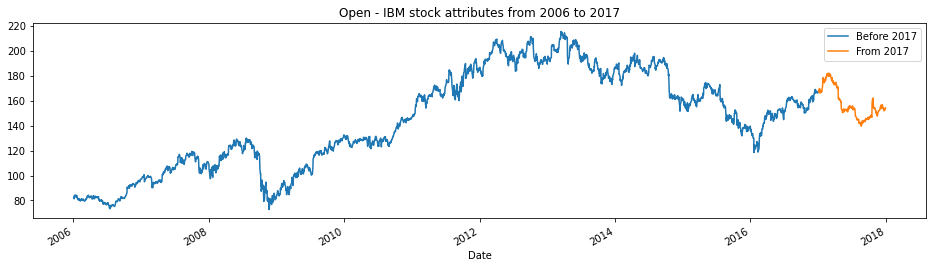

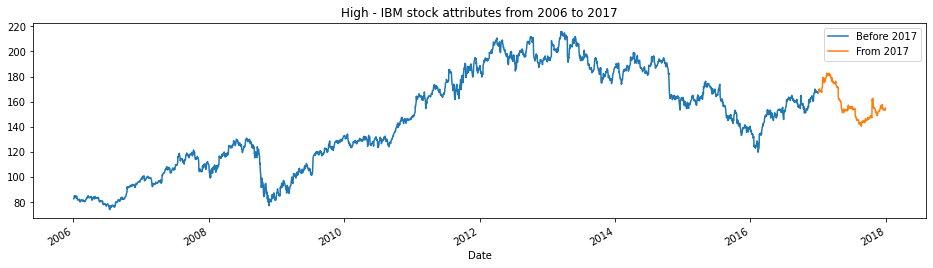

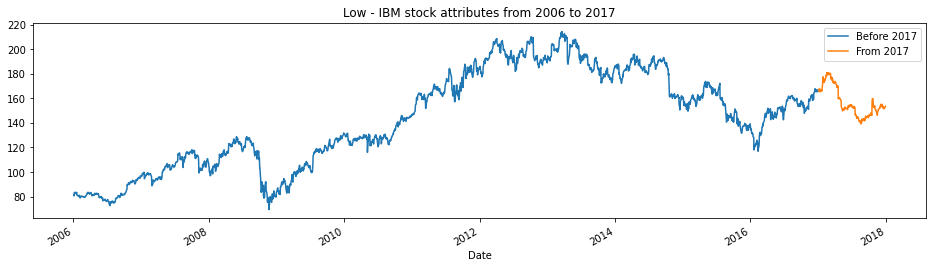

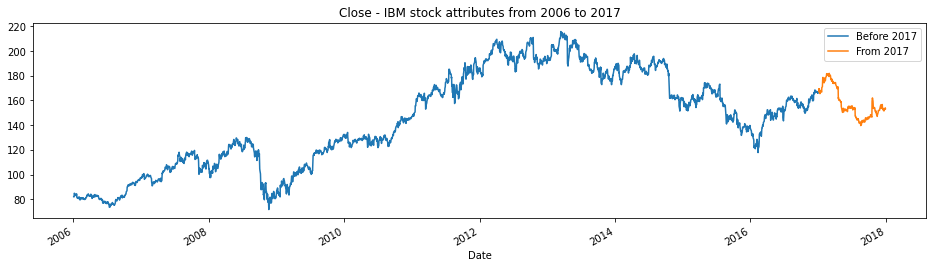

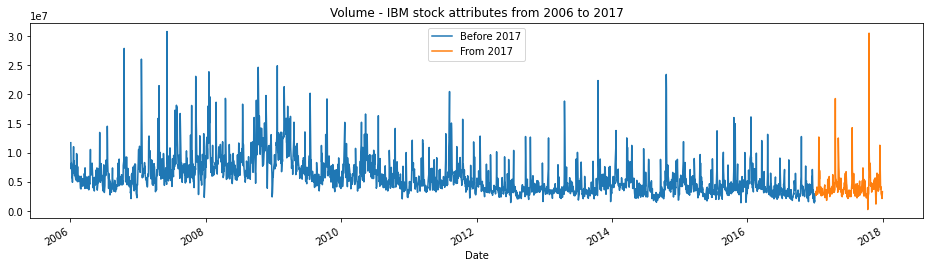

In [5]:
import matplotlib.pyplot as plt

for col in data.columns:
  if col != "Name":
    data[col][:'2016'].plot(figsize=(16,4), legend=True)
    data[col]["2017":].plot(figsize=(16,4), legend=True)
    plt.legend(["Before 2017", "From 2017"])
    plt.title(col+' - IBM stock attributes from 2006 to 2017')
    plt.show()

### Scaling the data

In [6]:
train = data[:'2016'].iloc[:, 1].values
train = train.reshape(-1, 1)
test = data['2017':].iloc[:, 1].values
test = test.reshape(-1, 1)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np

sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [8]:
train_scaled.shape

(2769, 1)

In [9]:
x_train = []
y_train = []

for i in range(50,train_scaled.shape[0]):
    x_train.append(train_scaled[i-50:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
x_train.shape

(2719, 50, 1)

In [11]:
y_train.shape

(2719,)

In [12]:
model = Sequential()
# first layer
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# second layer
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# third layer
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# fourth layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1))

In [13]:
model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
gru (GRU)                    (None, 50, 50)            15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                1

In [26]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32).history

Epoch 1/20
85/85 [==============================] - 6s 73ms/step - loss: 0.0029
Epoch 2/20
85/85 [==============================] - 6s 70ms/step - loss: 0.0029
Epoch 3/20
85/85 [==============================] - 6s 70ms/step - loss: 0.0027
Epoch 4/20
85/85 [==============================] - 6s 68ms/step - loss: 0.0026
Epoch 5/20
85/85 [==============================] - 6s 73ms/step - loss: 0.0025
Epoch 6/20
85/85 [==============================] - 6s 71ms/step - loss: 0.0024
Epoch 7/20
85/85 [==============================] - 6s 69ms/step - loss: 0.0023
Epoch 8/20
85/85 [==============================] - 6s 70ms/step - loss: 0.0023
Epoch 9/20
85/85 [==============================] - 6s 70ms/step - loss: 0.0022
Epoch 10/20
85/85 [==============================] - 6s 69ms/step - loss: 0.0020
Epoch 11/20
85/85 [==============================] - 6s 69ms/step - loss: 0.0022
Epoch 12/20
85/85 [==============================] - 6s 71ms/step - loss: 0.0021
Epoch 13/20
85/85 [==================

In [27]:
dataset_total = pd.concat((data['High'][:'2016'], data['High']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-50 : ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

(3020,)


In [28]:
x_test = []
for i in range(50, inputs.shape[0]):
    x_test.append(inputs[i-50:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
predicted = model.predict(x_test)
print(predicted.shape)

(251, 1)


In [30]:
predicted = sc.inverse_transform(predicted)

In [31]:
predicted.shape

(251, 1)

In [32]:
test.shape

(251, 1)

In [33]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real IBM stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("IBM stock price prediction")
    plt.xlabel("time")
    plt.ylabel("IBM stock price")
    plt.legend()
    plt.show()

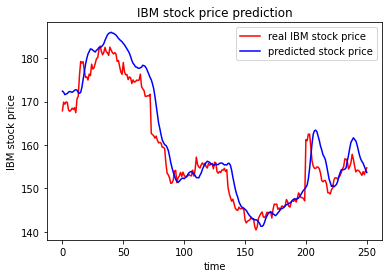

In [34]:
plot_predictions(test, predicted)

In [35]:
import math

rmse = math.sqrt(mean_squared_error(test, predicted))
print("the root mean squared error is : {}.".format(rmse))

the root mean squared error is : 3.986576872396659.
